In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# study_results.head()

mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [31]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [167]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Initial merge:
raw_merge = pd.merge(study_results,mouse_metadata, on="Mouse ID", how = "outer")


# raw_merge.head()

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = raw_merge.loc[raw_merge.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
#duplicate_mouse
# Dupliate ID = g989

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data = raw_merge.loc[raw_merge['Mouse ID'].isin(duplicate_mouse) == False]
merged_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [168]:
# Checking the number of mice in the clean DataFrame.
count = merged_data["Mouse ID"].value_counts()
count
# 248 unique mice

x581    10
c264    10
x773    10
z578    10
g296    10
        ..
d133     1
x226     1
x336     1
f932     1
v199     1
Name: Mouse ID, Length: 248, dtype: int64

 ## Summary Statistics

In [169]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Grab the columns we need:
tumor_table = merged_data[["Drug Regimen", "Tumor Volume (mm3)"]]
#tumor_table.head()

# Group for finding median: (Ask Tom in next class if this is needed or if it finds the median anyway)
tumor_table = tumor_table.sort_values(by=["Drug Regimen", "Tumor Volume (mm3)"])
#tumor_table.head()

# Group by the different stats:
tumor_stats = tumor_table.groupby(["Drug Regimen"]).mean()
tumor_stats["Median"] = tumor_table.groupby(["Drug Regimen"]).median()
tumor_stats["Variance"] = tumor_table.groupby(["Drug Regimen"]).var()
tumor_stats["Standard Deviation"] = tumor_table.groupby(["Drug Regimen"]).std()
tumor_stats["SEM"] = tumor_table.groupby(["Drug Regimen"]).sem()
# tumor_stats

# Rename Mean column
tumor_stats = tumor_stats.rename(columns = {"Tumor Volume (mm3)": "Mean"})
tumor_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [170]:
# Using the aggregation method, produce the same summary statistics in a single line



##  Bar and Pie Charts

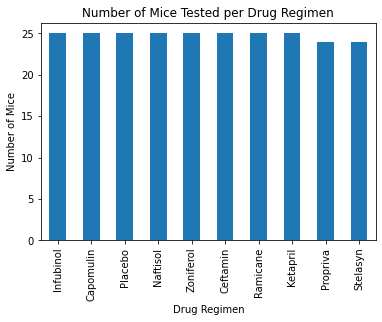

<Figure size 432x288 with 0 Axes>

In [171]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Get the two columns we need:
mouse_table = merged_data[["Mouse ID", "Drug Regimen"]]
#mouse_table

# Get the number of unique mice by dropping duplicates of their IDs:
unique_mouse_table = mouse_table.drop_duplicates(["Mouse ID"])
#unique_mouse_table

# Get the counts per drug regimen:
mouse_count_data = pd.DataFrame(unique_mouse_table["Drug Regimen"].value_counts())
#mouse_count_data.head(10)

# Make a bar plot using pandas:
mouse_panda_plot = mouse_count_data.plot.bar(title="Number of Mice Tested per Drug Regimen", legend=False)
mouse_panda_plot.set_xlabel("Drug Regimen")
mouse_panda_plot.set_ylabel("Number of Mice")
plt.show()
plt.tight_layout()

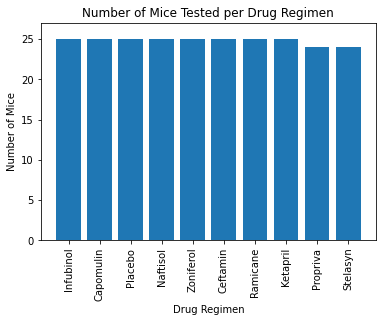

In [172]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Reset the index of py_bar_data
py_bar_data = mouse_count_data.reset_index(drop=False)
#py_bar_data

# Rename the columns:
py_bar_data = py_bar_data.rename(columns = {"index": "Drug", "Drug Regimen": "Mice Count"})
#py_bar_data

# Make the plot:
plt.bar(py_bar_data["Drug"], py_bar_data["Mice Count"])

# Formatting:
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(0, 27)
plt.xticks(rotation = "vertical")
plt.show()

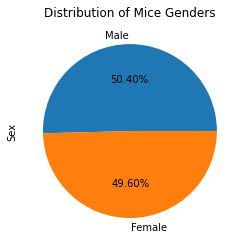

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a df of unique mice out of the whole merged_data, dropping duplicates by Mouse ID:
unique_merged_data = pd.DataFrame(merged_data)
unique_merged_data = unique_merged_data.drop_duplicates(["Mouse ID"])
#unique_merged_data


gender_count = unique_merged_data["Sex"].value_counts()
gender_graph = gender_count.plot(kind = "pie", autopct = "%1.2f%%")
gender_graph.set_title("Distribution of Mice Genders")
plt.show()



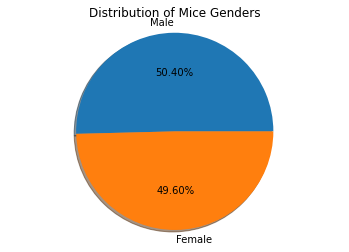

In [178]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Re-Show the counts:
#gender_count_data
#Male: 125
#Female: 123

# Use method from Stu_PyPies exercise:
genders = ["Male", "Female"]
counts = [125, 123]
plt.pie(counts, labels = genders, autopct="%1.2f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.title("Distribution of Mice Genders")
plt.show()


 ## Quartiles, Outliers and Boxplots

In [187]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = merged_data.groupby("Mouse ID")
max_timepoint = mouse_group["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
max_timepoint



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_merge = pd.merge(max_timepoint, merged_data, how = "left", on = ["Mouse ID", "Timepoint"])
tumor_merge
                       

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin, Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatment_list:
    
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
# add subset 
    
    
# Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

##  Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

##  Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen